*Copulas !?* What are they? Why do they exist?

Let's deal with it one by one.

What?
- a copula is a multivariate cdf for which the marginal probability distribution of each variable is uniform

Why?
- Sklar's theorem states that any multivariate joint distribution can be written in terms of univariate marginal distribution functions and a copula which describes the dependence structure between the variables.
- therefore, a copula describes the dependence between random variables

Usage
- widely in quant finance to model and minimize tail risk[1] and portfolio-optimization applications.[2]
- popular in high-dimensional stats where it becomes convenient to estimate the marginals and copulae separately

Common forms
- many parametric copula families available, often with parameters for controlling the strength of dependence. 
- 2D copulas called *permutons* and *doubly-stochastic measures* in math (is this important!?)
- 



In [2]:
%matplotlib inline
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Probability Integral Transform

how to transform from any distribution to uniform and back

* if something is *uniformly* distributed -> to an **arbitrary** pdf, 
    * then use the inverse cdf (ppf)
* if something is *arbitrarily* distributed -> to an **uniform** pdf,
    * then use the cdf (cdf)

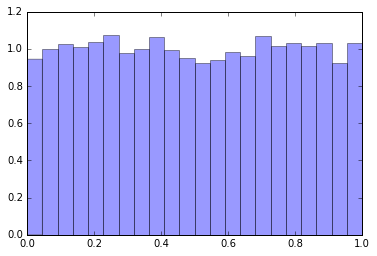

In [3]:
x = stats.uniform(0,1).rvs(10000)
sns.distplot(x,kde=False,norm_hist=True)

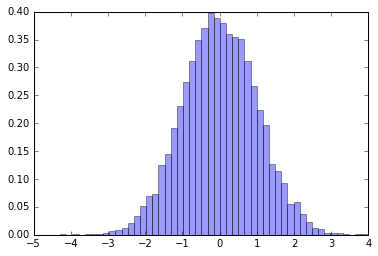

In [4]:
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans,kde=False,norm_hist=True)

How does the inverse cdf look like !?

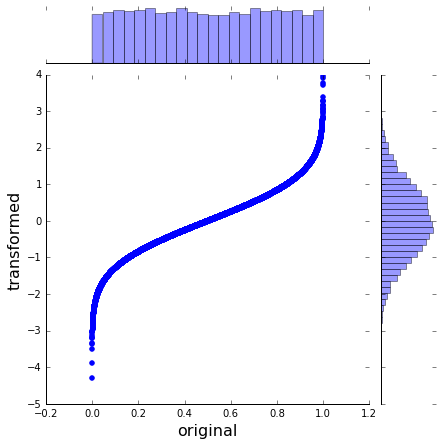

In [5]:
h = sns.jointplot(x,x_trans,stat_func=None)
h.set_axis_labels('original','transformed',fontsize=16)

The inverse cdf stretches the boundaries of the normal distribution to yield a normal

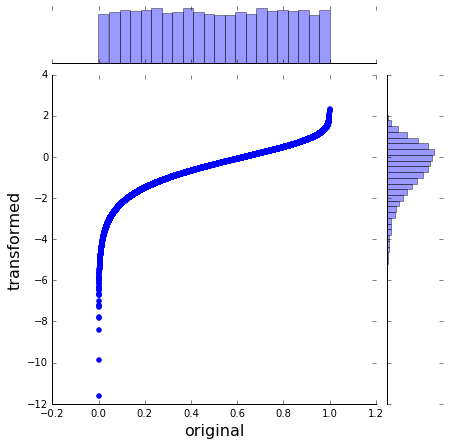

In [6]:
gumbel = stats.distributions.gumbel_l() # left-skewed gumbel distribution 
x_trans = gumbel.ppf(x) # ppf - percent point function (inverse of the cdf)
h = sns.jointplot(x,x_trans,stat_func=None)
h.set_axis_labels('original','transformed',fontsize=16)

In order to do the opposite transformation from an arbitrary distribution to the uniform(0, 1),<br> we just apply the inverse of the inverse CDF -- the CDF:

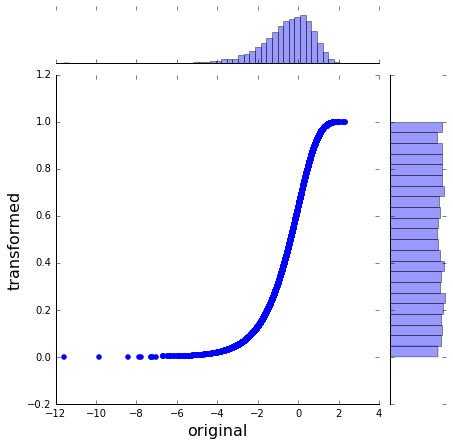

In [7]:
x_trans_trans = gumbel.cdf(x_trans)
h = sns.jointplot(x_trans, x_trans_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)

# Part 2- Gaussian Copulas

* simulate from a mvn with a specified covariance
* transform the arbitrary distribution (marginals) to a normal
* translate the uniform marginals to whatever we like

In [8]:
mvnorm = stats.multivariate_normal(mean=[0,0],cov=[[1.,0.5],[0.5,1.]])
x = mvnorm.rvs(1000)
x.shape

(1000, 2)

In [9]:
x= np.array(x)

In [10]:
import statsmodels
import imp
imp.reload(statsmodels)
statsmodels.__version__

'0.8.0.dev0+302c2ec'

/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


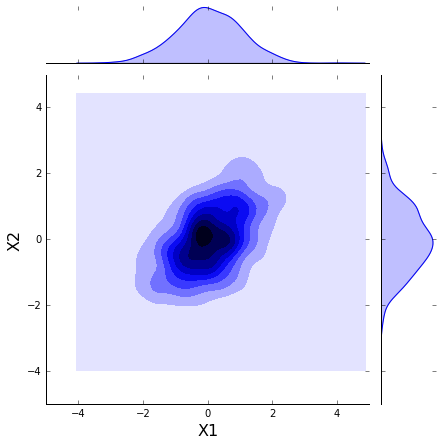

In [11]:
h = sns.jointplot(x[:,0],x[:,1],kind='kde',stat_func=None)
h.set_axis_labels('X1','X2',fontsize=16)

let's now convert these marginals into uniform distributions

/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


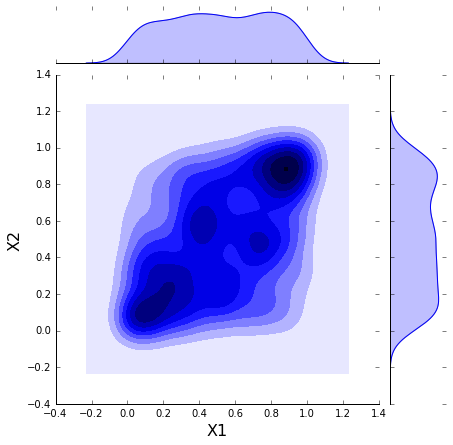

In [17]:
n = stats.distributions.norm()
x_trans = n.cdf(x)
h = sns.jointplot(x_trans[:,0],x_trans[:,1],kind='kde',stat_func=None)
h.set_axis_labels('X1','X2',fontsize=16)

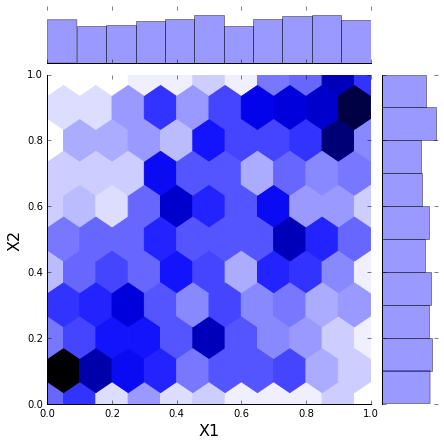

In [19]:
n = stats.norm()
x_trans = n.cdf(x)
h = sns.jointplot(x_trans[:,0],x_trans[:,1],kind='hex',stat_func=None)
h.set_axis_labels('X1','X2',fontsize=16)

we can now transform the marginals to whatever distributions we want:

/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


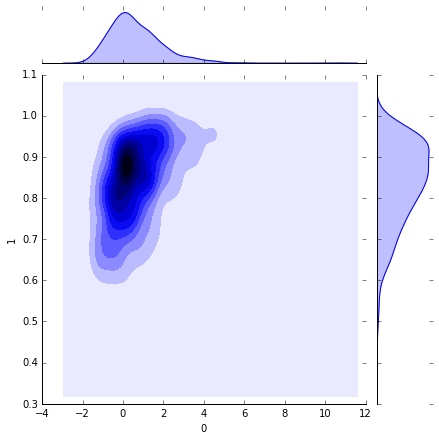

In [23]:
gumbel_r = stats.distributions.gumbel_r()
beta = stats.distributions.beta(a=10,b=2)
x_trans_trans[:,0] = gumbel_r.ppf(x_trans[:,0])
x_trans_trans[:,1] = beta.ppf(x_trans[:,1])
h= sns.jointplot(x_trans_trans[:,0],x_trans_trans[:,1],kind='kde',stat_func=None)
h.set_axis_labels('0','1')

contrast this to a joint distribution without any correlations:

/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


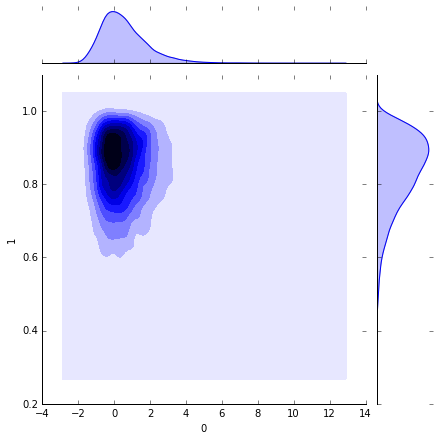

In [24]:
h= sns.jointplot(gumbel_r.rvs(10000),beta.rvs(10000),kind='kde',stat_func=None)
h.set_axis_labels('0','1')

<b>Summary</b><br>
using the uniform distribution as our lingua franca we can easily induce correlations and flexibly construct complex probability distributions. This all directly extends to higher dimensional distributions as well.

In [26]:
x_trans_trans

array([[ 4.06449429,  0.95262614],
       [ 0.4007365 ,  0.80690306],
       [ 1.20052847,  0.86927988],
       ..., 
       [-1.19917113,  0.52109423],
       [ 0.2330746 ,  0.85096058],
       [ 0.74285117,  0.87022073]])

In [44]:
# from statsmodels.distributions.empirical_distribution import ECDF
# tm = ECDF(x_trans_trans)
# plt.plot(tm.x)

In [56]:
from scipy import stats
class your_distribution(stats.rv_continuous):
    def _pdf(self, x):
        return ( np.sin(x) ** (-0.75) ) / (4.32141 * (x ** (1/5)))

distribution = your_distribution(stats.gumbel_l)


In [80]:
arbitrary_empirical_dist = stats.distributions.gumbel_r().rvs(10000)

(array([  338.,   707.,   817.,   914.,   929.,   959.,   924.,   976.,
         1055.,  2381.]),
 array([ 0.01072049,  0.10964844,  0.20857639,  0.30750434,  0.40643229,
         0.50536024,  0.6042882 ,  0.70321615,  0.8021441 ,  0.90107205,  1.        ]),
 <a list of 10 Patch objects>)

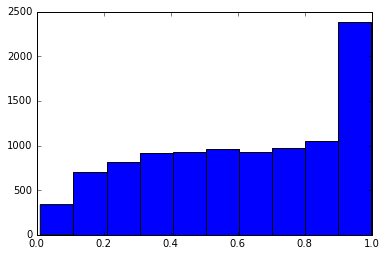

In [81]:
m = stats.distributions.norm.cdf(arbitrary_empirical_dist)
plt.hist(m)

# Random walk test

/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


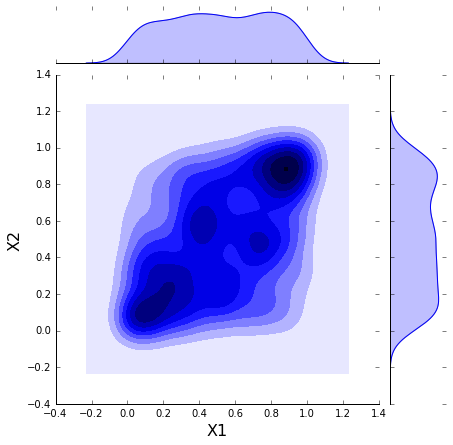

In [82]:
n = stats.distributions.norm()
x_trans = n.cdf(x)
h = sns.jointplot(x_trans[:,0],x_trans[:,1],kind='kde',stat_func=None)
h.set_axis_labels('X1','X2',fontsize=16)

In [268]:
# Jump characteristics
proposed_cov = [[1.,0.5],[0.5,1.]]

# Evalute pdf of 2d
gkde = gaussian_kde(x_trans.T)

# Set random initilization point 
random_initialization = np.zeros(2)
random_initialization[0] = x_trans[(np.random.randint(x_trans[:,0].shape[0])),0]
random_initialization[1] = x_trans[(np.random.randint(x_trans[:,1].shape[0])),1]
print("Random init ",random_initialization)

current_draw = random_initialization
posterior = [current_draw]
for i in range(x_trans.shape[0]*2):
    print("---------------------------")
    print("    iter     ",i)
    # Current point and Likelihood

    print("Current: ",current_draw)
    current_likelihood = gkde.pdf(current_draw)

    # Jump(New point) and Likelihood
    proposed_mvnorm = stats.multivariate_normal(mean=current_draw,cov=proposed_cov)
    proposed_draw = proposed_mvnorm.rvs(1)
    print("proposed: ", proposed_draw)
    proposed_likelihood = gkde.pdf(proposed_draw)
    print("\nCurrent Likelihood: ",current_likelihood)
    print("Proposed Likelihood: ",proposed_likelihood)

    # Evaluate whether to jump or not
    p_accept = proposed_likelihood*1. / current_likelihood
    print("Accept ratio: ",p_accept)
    accept = np.random.rand() < p_accept

    if accept:
        # Update position
        print("Accepted!")
        current_draw = proposed_draw
        posterior.append(current_draw)
        




Random init  [ 0.91930783  0.15071667]
---------------------------
    iter      0
Current:  [ 0.91930783  0.15071667]
proposed:  [ 1.62560285 -0.97470288]

Current Likelihood:  [ 0.34346634]
Proposed Likelihood:  [  3.86824455e-75]
Accept ratio:  [  1.12623685e-74]
---------------------------
    iter      1
Current:  [ 0.91930783  0.15071667]
proposed:  [ 1.33080725  0.6573485 ]

Current Likelihood:  [ 0.34346634]
Proposed Likelihood:  [  4.86527320e-05]
Accept ratio:  [ 0.00014165]
---------------------------
    iter      2
Current:  [ 0.91930783  0.15071667]
proposed:  [-0.07319983 -1.01139829]

Current Likelihood:  [ 0.34346634]
Proposed Likelihood:  [  3.56292168e-28]
Accept ratio:  [  1.03734230e-27]
---------------------------
    iter      3
Current:  [ 0.91930783  0.15071667]
proposed:  [-1.1656044 -1.8998327]

Current Likelihood:  [ 0.34346634]
Proposed Likelihood:  [  1.09830682e-96]
Accept ratio:  [  3.19771310e-96]
---------------------------
    iter      4
Current:  [ 

In [270]:
pposterior = np.zeros((len(posterior),2))
pposterior[:,0]=[i[0] for i in np.array(posterior)]
pposterior[:,1]=[i[1] for i in np.array(posterior)]

/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/arvind/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


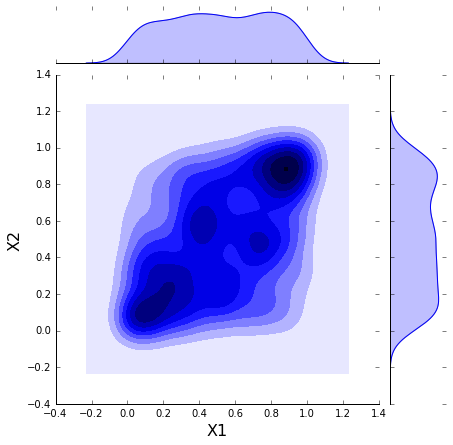

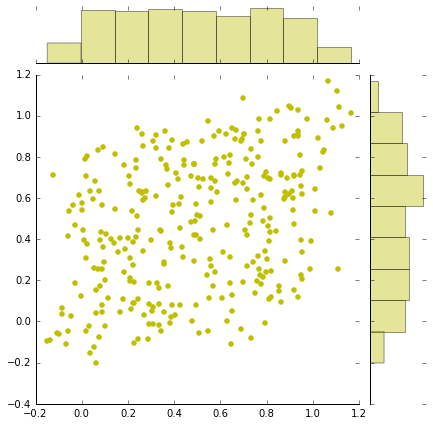

In [271]:
h = sns.jointplot(x_trans[:,0],x_trans[:,1],kind='kde',stat_func=None)
h.set_axis_labels('X1','X2',fontsize=16)
sns.jointplot(pposterior[:,0],pposterior[:,1],kind='scatter',stat_func=None,color='y')

In [142]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

In [110]:
x_trans.shape

(1000, 2)

In [172]:
kde.pdf(data[0,:])

array([ 56895.24756489])

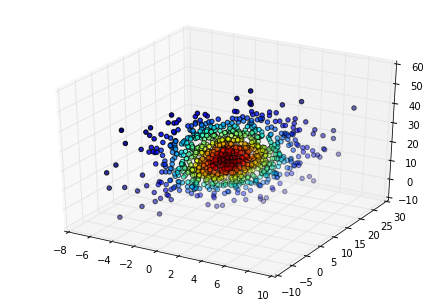

In [151]:
%matplotlib inline
mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)
density = kde(values)
fig = plt.figure()
#fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax = Axes3D(fig)
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [152]:
data[0]

array([  2.64811066,  14.12027666,  17.72731796])

In [156]:
kde.evaluate(data[1])

array([ 16779.73756492])

In [154]:
kde.pdf(data[1])

array([ 16779.73756492])